In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('pop_worldometer_data.csv')

In [3]:
df1

,Country (or dependency),Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3,50.0,100.0,NaN,NaN,NaN,10.0,0.00
231,Falkland Islands,3480,3.05,103,0.0,12170.0,NaN,NaN,NaN,66.0,0.00
232,Niue,1626,0.68,11,6.0,260.0,NaN,NaN,NaN,46.0,0.00
233,Tokelau,1357,1.27,17,136.0,10.0,NaN,NaN,NaN,0.0,0.00


In [4]:
df1.rename(columns ={'Country (or dependency)':'country'},inplace = True)

In [5]:
(df1['World Share %']<2.00).sum()

other_population = 45.74

In [6]:
# series
aa =df1['country'][:8]
aa.add('others')
print(aa)

#list

aa=[]
for m in df1['country'][:8]:
        aa.append(m)
aa.append('others')
print(aa)
bb=[]
for l in df1['World Share %']:
    if l> 2:
        bb.append(l)
bb.append(45.76)
print(bb)

0            China
1            India
2    United States
3        Indonesia
4         Pakistan
5           Brazil
6          Nigeria
7       Bangladesh
Name: country, dtype: object
['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil', 'Nigeria', 'Bangladesh', 'others']
[18.47, 17.7, 4.25, 3.51, 2.83, 2.73, 2.64, 2.11, 45.76]


In [7]:
total = sum(bb)
print(total)

100.0


In [8]:
df1.loc[(df1['World Share %']>2.00),['country','Population (2020)','World Share %']]

,country,Population (2020),World Share %
0,China,1439323776,18.47
1,India,1380004385,17.70
2,United States,331002651,4.25
3,Indonesia,273523615,3.51
4,Pakistan,220892340,2.83
5,Brazil,212559417,2.73
6,Nigeria,206139589,2.64
7,Bangladesh,164689383,2.11


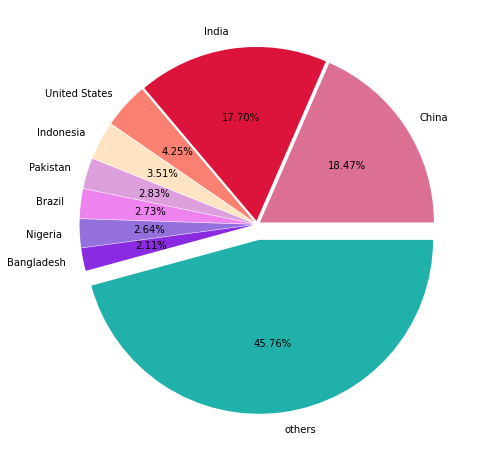

In [9]:
explode =[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.09]
plt.figure(figsize =(8,8))
mycolors = ["palevioletred","crimson","salmon", "bisque", "plum", "violet","mediumpurple","blueviolet","lightseagreen"]
plt.pie(bb, labels = (aa),explode =explode,autopct=lambda p: '{:.2f}%'.format(p * total / 100),colors =mycolors)
theme = plt.get_cmap('jet')
plt.show()

[Text(0.5, 0, ''), Text(0, 0.5, 'Density (P/Km²)')]

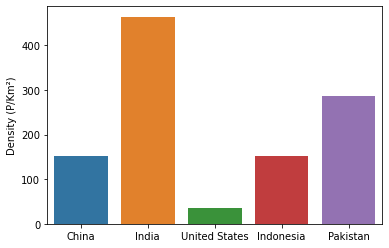

In [10]:
ax = sns.barplot(x=df1['country'][:5], y =df1['Density (P/Km²)'][:5])
ax.set(xlabel='', ylabel='Density (P/Km²)')

#sns.lineplot(x=df1['country'][:5], y =df1['Density (P/Km²)'][:5],color ='black')

Text(0.5, 0, 'Population count')

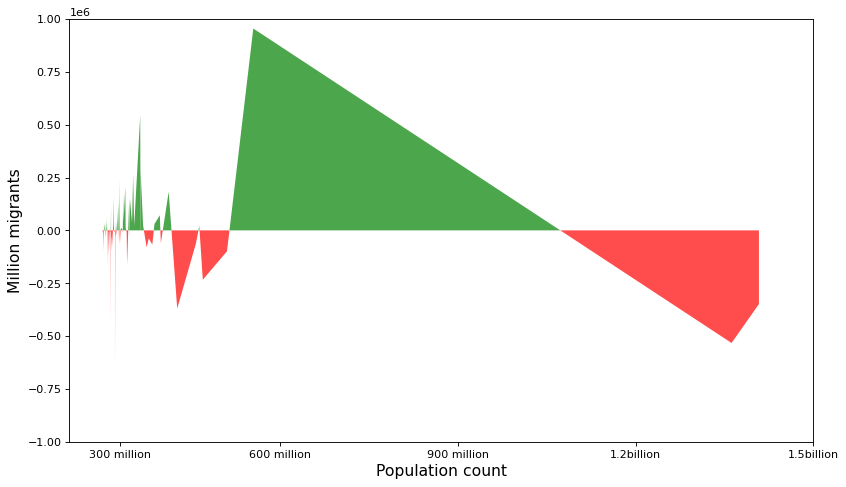

In [11]:


plt.figure(figsize=(12,7), dpi= 80)

plt.annotate('Peak \n1975', xy=(94.0, 21.0), xytext=(88.0, 28),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.05), fontsize=15, color='white')

plt.fill_between(df1['World Share %'][:200],df1['Migrants (net)'][:200], 0, where=df1['Migrants (net)'][:200] >= 0, facecolor='green', interpolate=True, alpha=0.7)
plt.fill_between(df1['World Share %'][:200],df1['Migrants (net)'][:200], 0, where=df1['Migrants (net)'][:200] <= 0, facecolor='red', interpolate=True, alpha=0.7)
plt.ylim(-1000000,1000000)

ticks = ['300 million','600 million', '900 million', '1.2billion', '1.5billion']
x = np.array([0.5, 5, 10, 15, 20])
plt.xticks(x, ticks)

plt.ylabel('Million migrants',size =14)
plt.xlabel('Population count',size =14)

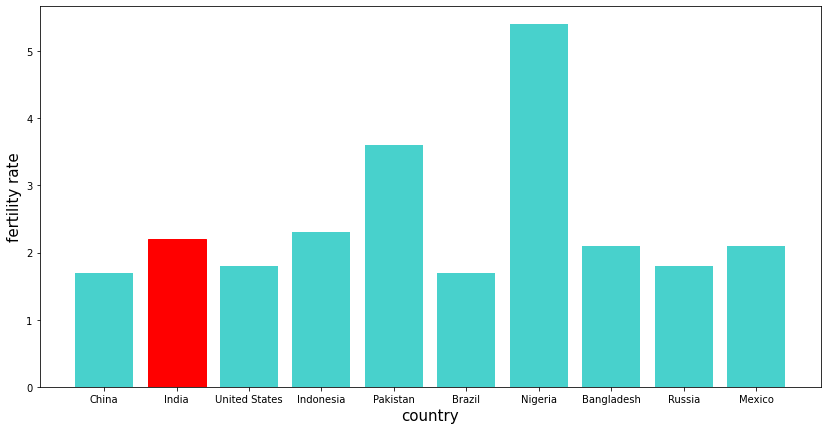

In [12]:
plt.figure(figsize =(14,7))
x = plt.bar(df1['country'][:10],df1['Fert. Rate'][0:10], color ='mediumturquoise')
plt.xlabel('country',size =15)
plt.ylabel('fertility rate',size =15)
x[1].set_color('red')

In [13]:
df1.sort_values(by ='Fert. Rate',ascending = False).loc[:, ['country', 'Fert. Rate', 'Density (P/Km²)','Population (2020)','World Share %']] 

,country,Fert. Rate,Density (P/Km²),Population (2020),World Share %
55,Niger,7.0,19.0,24206644,0.31
72,Somalia,6.1,25.0,15893222,0.20
15,DR Congo,6.0,40.0,89561403,1.15
59,Mali,5.9,17.0,20250833,0.26
71,Chad,5.8,13.0,16425864,0.21
...,...,...,...,...,...
230,Montserrat,NaN,50.0,4992,0.00
231,Falkland Islands,NaN,0.0,3480,0.00
232,Niue,NaN,6.0,1626,0.00
233,Tokelau,NaN,136.0,1357,0.00


In [14]:
df2 = pd.read_csv('population_total_long.csv')
df2

,Country Name,Year,Count
0,Aruba,1960,54211
1,Afghanistan,1960,8996973
2,Angola,1960,5454933
3,Albania,1960,1608800
4,Andorra,1960,13411
...,...,...,...
12590,Kosovo,2017,1830700
12591,"Yemen, Rep.",2017,27834821
12592,South Africa,2017,57000451
12593,Zambia,2017,16853688


In [16]:
per_year_population =[]
years =[]
for i in range(0,df2['Country Name'].count()):
    if df2['Country Name'][i]== 'India':
        years.append(df2['Year'][i])
        per_year_population.append(df2['Count'][i])
        
#print(per_year_population)


In [17]:
ye =[2018,2019,2020,2021,2022]
for i in ye :
    years.append(i)
print(years)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [18]:
z = [1359003306,1383112050,1396387127,1407562842,1417173173]
for i in z:
    per_year_population.append(i)


In [19]:
print(len(per_year_population))
print(len(years))

63
63


In [20]:
pdata = pd.DataFrame({'year':years ,'population in billion':per_year_population})
pdata

,year,population in billion
0,1960,450547679
1,1961,459642165
2,1962,469077190
3,1963,478825608
4,1964,488848135
...,...,...
58,2018,1359003306
59,2019,1383112050
60,2020,1396387127
61,2021,1407562842


<AxesSubplot:xlabel='year', ylabel='population in billion'>

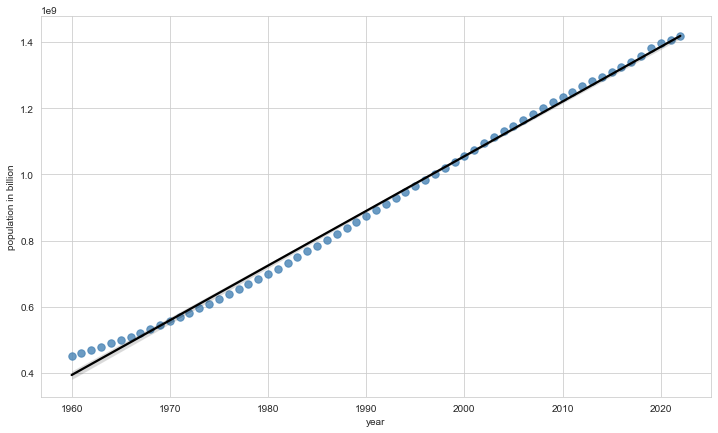

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize =(12,7))
sns.regplot(x = 'year', y = 'population in billion', data =pdata, line_kws={'color' :'black'},scatter_kws={"s": 55, 'color' :'steelblue'},)

In [22]:
for i in range(2023,2101):
    years.append(i)
print(years)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100]


In [23]:
a1 =[]
for i in range(1,79):
    o = 1471731731 +i*14171731
    a1.append(o)
print(a1)

[1485903462, 1500075193, 1514246924, 1528418655, 1542590386, 1556762117, 1570933848, 1585105579, 1599277310, 1613449041, 1627620772, 1641792503, 1655964234, 1670135965, 1684307696, 1698479427, 1712651158, 1726822889, 1740994620, 1755166351, 1769338082, 1783509813, 1797681544, 1811853275, 1826025006, 1840196737, 1854368468, 1868540199, 1882711930, 1896883661, 1911055392, 1925227123, 1939398854, 1953570585, 1967742316, 1981914047, 1996085778, 2010257509, 2024429240, 2038600971, 2052772702, 2066944433, 2081116164, 2095287895, 2109459626, 2123631357, 2137803088, 2151974819, 2166146550, 2180318281, 2194490012, 2208661743, 2222833474, 2237005205, 2251176936, 2265348667, 2279520398, 2293692129, 2307863860, 2322035591, 2336207322, 2350379053, 2364550784, 2378722515, 2392894246, 2407065977, 2421237708, 2435409439, 2449581170, 2463752901, 2477924632, 2492096363, 2506268094, 2520439825, 2534611556, 2548783287, 2562955018, 2577126749]


In [24]:
for i in a1:
    per_year_population.append(i)
print(per_year_population)

[450547679, 459642165, 469077190, 478825608, 488848135, 499123324, 509631500, 520400576, 531513824, 543084336, 555189792, 567868018, 581087256, 594770134, 608802600, 623102897, 637630087, 652408776, 667499806, 682995354, 698952844, 715384993, 732239504, 749428958, 766833410, 784360008, 801975244, 819682102, 837468930, 855334678, 873277798, 891273209, 909307016, 927403860, 945601831, 963922588, 982365243, 1000900030, 1019483581, 1038058156, 1056575549, 1075000085, 1093317189, 1111523144, 1129623456, 1147609927, 1165486291, 1183209472, 1200669765, 1217726215, 1234281170, 1250288729, 1265782790, 1280846129, 1295604184, 1310152403, 1324509589, 1338658835, 1359003306, 1383112050, 1396387127, 1407562842, 1417173173, 1485903462, 1500075193, 1514246924, 1528418655, 1542590386, 1556762117, 1570933848, 1585105579, 1599277310, 1613449041, 1627620772, 1641792503, 1655964234, 1670135965, 1684307696, 1698479427, 1712651158, 1726822889, 1740994620, 1755166351, 1769338082, 1783509813, 1797681544, 1811

In [25]:
print(len(per_year_population))
print(len(years))

141
141


In [26]:
# 78 new 62 old

from sklearn.linear_model import LinearRegression 
reg = LinearRegression()

In [27]:
x= years
y= per_year_population
print(len(x),len(y))

141 141


In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.55)

In [29]:
print(len(x_train),len(y_train))

63 63


In [30]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [31]:
model = reg.fit(x_train , y_train) 

In [32]:
print(len(x_train),len(y_train))

63 63


In [33]:
print(len(y_train))
print(len(x_train))

63
63


In [34]:
y_pred = model.predict(x_test)


In [35]:
print(len(x_test),len(y_test))

78 78


In [36]:
len(y_pred)

78

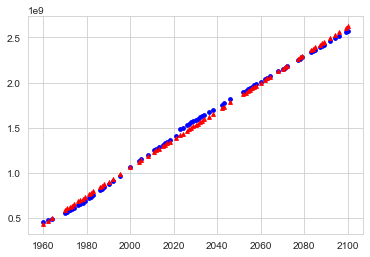

<Figure size 1152x1152 with 0 Axes>

In [37]:

plt.scatter(x_test, y_test , c="b",s =14)
plt.scatter(x_test, y_pred , c="r",marker ="^",s =14)

plt.figure(figsize = (16,16))
plt.show()

In [38]:
df3 = pd.read_csv('population_below_age_14_percentage_long.csv')

In [39]:
df3

,Country Name,Year,Count
0,Aruba,1960,43
1,Afghanistan,1960,42
2,Angola,1960,42
3,Albania,1960,40
4,United Arab Emirates,1960,44
...,...,...,...
11297,Samoa,2017,38
11298,"Yemen, Rep.",2017,40
11299,South Africa,2017,29
11300,Zambia,2017,45


In [40]:
Year =[]

for i in range(0,df3['Country Name'].count()):
    if df3['Country Name'][i]== 'India':
        Year.append(df3['Year'][i])
        
l11 =[2018,2019,2020,2021,2022]
for i in l11 :
    Year.append(i)

print(Year)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [41]:
count14 =[]

for i in range(0,df3['Country Name'].count()):
    if df3['Country Name'][i]== 'India':
        count14.append(df3['Count'][i])
l22 = [26,26,25,25,24]
        

for i in l22 :
    count14.append(i)

print(count14)
print(len(count14))

[40, 40, 41, 41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 40, 39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 37, 37, 37, 37, 36, 36, 36, 35, 35, 35, 34, 34, 33, 33, 33, 32, 32, 32, 31, 31, 30, 30, 29, 29, 28, 28, 27, 27, 26, 26, 25, 25, 24]
63


In [42]:
df4 = pd.read_csv('population_above_age_65_percentage_long.csv')
df4

,Country Name,Year,Count
0,Aruba,1960,2
1,Afghanistan,1960,2
2,Angola,1960,3
3,Albania,1960,5
4,United Arab Emirates,1960,3
...,...,...,...
11297,Samoa,2017,4
11298,"Yemen, Rep.",2017,2
11299,South Africa,2017,5
11300,Zambia,2017,2


In [43]:
count65 =[]

for i in range(0,df4['Country Name'].count()):
    if df4['Country Name'][i]== 'India':
        count65.append(df4['Count'][i])
l23 = [5,5,5,5,5]
        

for i in l23 :
    count65.append(i)

print(count65)
print(len(count65))

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
63


In [44]:
countm = []
d =0
while d< len(count14):
    countm.append(100-count14[d]+count65[d])
    d = d+1
print(countm)                                 


[63, 63, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 66, 66, 66, 66, 67, 68, 68, 69, 69, 69, 70, 70, 71, 71, 71, 72, 72, 72, 73, 74, 75, 75, 76, 76, 77, 77, 78, 78, 79, 79, 80, 80, 81]


In [45]:
my_data = pd.DataFrame({'year': Year,'population_above_65' : count65, 'population_below_14': count14,'population_between_14_and_65':countm})

In [46]:
my_data

,year,population_above_65,population_below_14,population_between_14_and_65
0,1960,3,40,63
1,1961,3,40,63
2,1962,3,41,62
3,1963,3,41,62
4,1964,3,41,62
...,...,...,...,...
58,2018,5,26,79
59,2019,5,26,79
60,2020,5,25,80
61,2021,5,25,80


In [47]:
my_data.iloc[2::10]

,year,population_above_65,population_below_14,population_between_14_and_65
2,1962,3,41,62
12,1972,3,40,63
22,1982,3,39,64
32,1992,3,37,66
42,2002,4,33,71
52,2012,5,29,76
62,2022,5,24,81


In [48]:
my_data.population_above_65 + my_data.population_below_14

0     43
1     43
2     44
3     44
4     44
      ..
58    31
59    31
60    30
61    30
62    29
Length: 63, dtype: int64

In [49]:
c1 = count14[2::10]
print(c1)

[41, 40, 39, 37, 33, 29, 24]


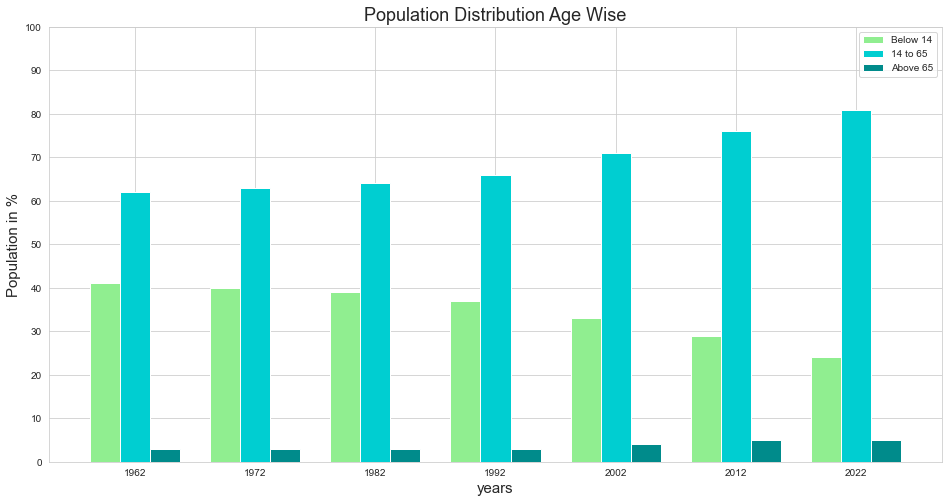

In [50]:
N = 7
ind = np.arange(N) 
width = 0.25
plt.figure(figsize=(16,8))
xvals = count14[2::10]
bar1 =plt.bar(ind, xvals, width, color = 'lightgreen')
  
yvals = countm[2::10]
bar2 =plt.bar(ind+width, yvals, width, color='darkturquoise')
  
zvals = count65[2::10]
bar3 =plt.bar(ind+width*2, zvals, width, color = 'darkcyan')
  
plt.xlabel("years",size = 15)
plt.ylabel('Population in %', size =15)
plt.title("Population Distribution Age Wise", size= 18)
plt.yticks(range(0,101,10))
plt.xticks(ind+width,['1962', '1972', '1982', '1992','2002','2012', '2022'])
plt.legend( (bar1, bar2, bar3), ('Below 14', '14 to 65', 'Above 65') )
plt.show()

In [51]:
df5 = pd.read_csv('population_female_percentage_long.csv')

In [52]:
df5

,Country Name,Year,Count
0,Aruba,1960,50
1,Afghanistan,1960,48
2,Angola,1960,49
3,Albania,1960,48
4,United Arab Emirates,1960,49
...,...,...,...
11297,Samoa,2017,48
11298,"Yemen, Rep.",2017,49
11299,South Africa,2017,50
11300,Zambia,2017,50


In [53]:
countf =[]

for i in range(0,df5['Country Name'].count()):
    if df5['Country Name'][i]== 'India':
        countf.append(df5['Count'][i])
mm =[49,49.5,50,50.5,50.8]
for i in mm:
    countf.append(i)
print(countf)

[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48, 49, 49.5, 50, 50.5, 50.8]


In [54]:
countmale = []
d =0
while d< len(countf):
    countmale.append(100-countf[d])
    d = d+1
print(countmale) 

[52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 52, 52, 52, 51, 50.5, 50, 49.5, 49.2]


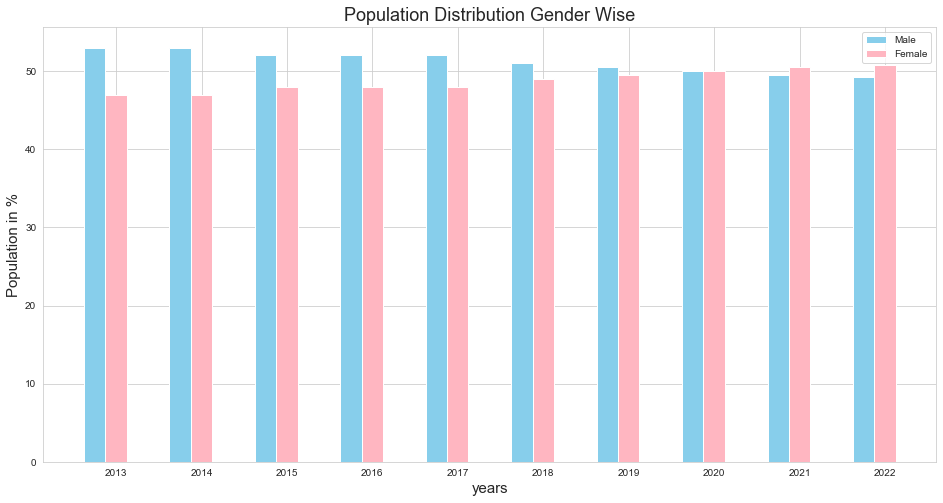

In [55]:
N = 10
ind = np.arange(N) 
width = 0.25
plt.figure(figsize=(16,8))
xvals = countmale[-10:]
bar1 =plt.bar(ind, xvals, width, color = 'skyblue')
  
yvals = countf[-10:]
bar2 =plt.bar(ind+width, yvals, width, color='lightpink')
  

  
plt.xlabel("years",size = 15)
plt.ylabel('Population in %', size =15)
plt.title("Population Distribution Gender Wise", size= 18)
  
plt.xticks(ind+width,[ '2013', '2014', '2015','2016','2017', '2018','2019','2020','2021','2022'])
plt.legend( (bar1, bar2), ('Male', 'Female') )
plt.show()

In [56]:
df11 = pd.read_csv('pop_worldometer_data.csv').copy()
df11.rename(columns = {'Country (or dependency)':'country'},inplace = True)
#df1.rename(columns ={'Country (or dependency)':'country'},inplace = True)

In [57]:
df11

,country,Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3,50.0,100.0,NaN,NaN,NaN,10.0,0.00
231,Falkland Islands,3480,3.05,103,0.0,12170.0,NaN,NaN,NaN,66.0,0.00
232,Niue,1626,0.68,11,6.0,260.0,NaN,NaN,NaN,46.0,0.00
233,Tokelau,1357,1.27,17,136.0,10.0,NaN,NaN,NaN,0.0,0.00


In [58]:

data1 = df11.loc[(df11['World Share %']>1.00),['Urban Pop %','World Share %']].head(10)
data1

,Urban Pop %,World Share %
0,61.0,18.47
1,35.0,17.70
2,83.0,4.25
3,56.0,3.51
4,35.0,2.83
5,88.0,2.73
6,52.0,2.64
7,39.0,2.11
8,74.0,1.87
9,84.0,1.65


In [59]:
df11['country'].head(10)

0            China
1            India
2    United States
3        Indonesia
4         Pakistan
5           Brazil
6          Nigeria
7       Bangladesh
8           Russia
9           Mexico
Name: country, dtype: object

Text(0.5, 0, 'Country')

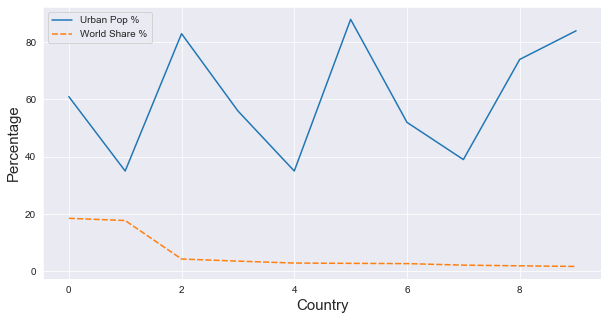

In [60]:
# v =['China','India','USA','Indonesia','Pakistan','Brazil','Nigeria','Bangladesh','Russia','Mexico']
# plt.xticks(v)
sns.set_style("darkgrid")
plt.figure(figsize = (10,5))
sns.lineplot(data = data1)
plt.ylabel('Percentage',size = 15)
plt.xlabel('Country',size = 15)

In [61]:
df1

,country,Population (2020),Yearly Change %,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share %
0,China,1439323776,0.39,5540090,153.0,9388211.0,-348399.0,1.7,38.0,61.0,18.47
1,India,1380004385,0.99,13586631,464.0,2973190.0,-532687.0,2.2,28.0,35.0,17.70
2,United States,331002651,0.59,1937734,36.0,9147420.0,954806.0,1.8,38.0,83.0,4.25
3,Indonesia,273523615,1.07,2898047,151.0,1811570.0,-98955.0,2.3,30.0,56.0,3.51
4,Pakistan,220892340,2.00,4327022,287.0,770880.0,-233379.0,3.6,23.0,35.0,2.83
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4992,0.06,3,50.0,100.0,NaN,NaN,NaN,10.0,0.00
231,Falkland Islands,3480,3.05,103,0.0,12170.0,NaN,NaN,NaN,66.0,0.00
232,Niue,1626,0.68,11,6.0,260.0,NaN,NaN,NaN,46.0,0.00
233,Tokelau,1357,1.27,17,136.0,10.0,NaN,NaN,NaN,0.0,0.00


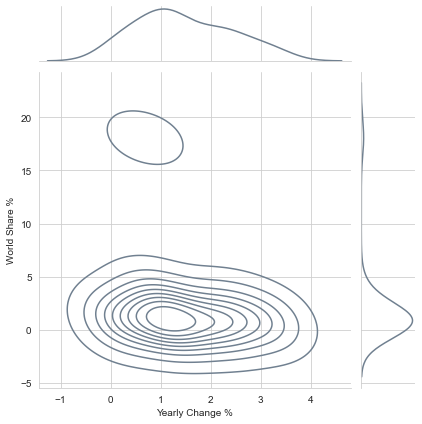

In [62]:
sns.set_style('whitegrid')
sns.jointplot(x=df1['Yearly Change %'][:50], y=df1['World Share %'][:50], kind="kde",color = 'slategrey')

In [63]:
cc = df1.country[:10]
cc
yy = df1['Med. Age'][:10]
yy
#df1.loc[(df1['World Share %']>2.00),['country','Population (2020)','World Share %']]

0    38.0
1    28.0
2    38.0
3    30.0
4    23.0
5    33.0
6    18.0
7    28.0
8    40.0
9    29.0
Name: Med. Age, dtype: float64

In [64]:
df1['Med. Age'].min()

15.0

(10.0, 50.0)

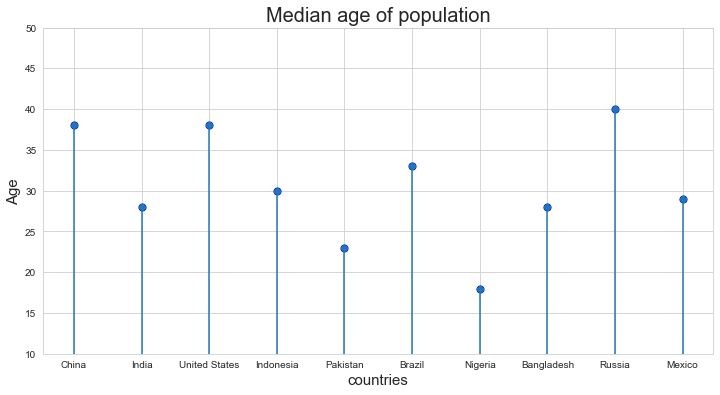

In [65]:
plt.figure(figsize=(12,6))
plt.scatter(cc,yy,color = 'b',s =50)
plt.yticks(range(10,51,5))
plt.title('Median age of population',fontsize = 20)
plt.xlabel('countries',fontsize = 15)
plt.ylabel('Age',fontsize = 15)
plt.stem(yy)
plt.ylim(10,50)
#plt.plot(cc,yy)